In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# 1. Integration metrics

This measures how nodes tend to be **interconnected** with each other.

## 1.1 Distance, path, and shortest path

- **Distance** : It is the **number of edges** required to traverse to the **target** node from the **source** node.
- **Path** : It is the **set of edges** connecting source node $\mathcal{i}$ to target node $\mathcal{j}$.
- **Shortest Path**: It is the **lowest** number of edges traversed to get to **target node** $\mathcal{j}$ from **source node** $\mathcal{i}$ amongst all the other possible paths.
- **Diameter** : It is **number of edges** contained in the **longest shortest path** among all possible **shortest paths**.

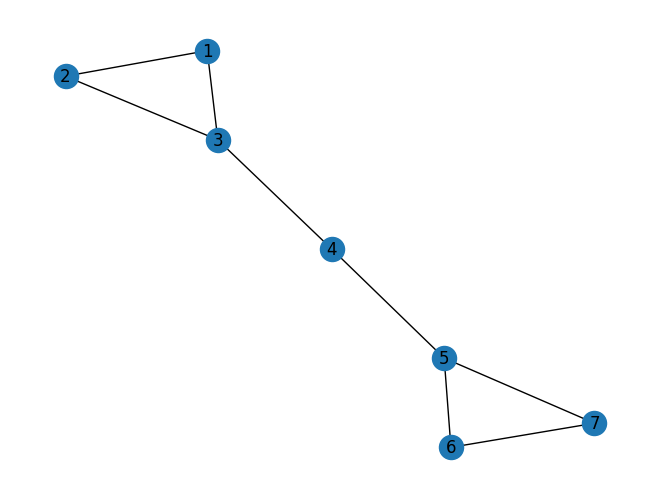

In [2]:
G = nx.Graph()

nodes = {1: "Dublin", 2: "Paris", 3:"Milan", 4:"Rome", 5:"Naples", 6:"Moscow", 7:"Tokyo"}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 5)])

nx.draw(G, with_labels=True)

In [3]:
shortest_path = nx.shortest_path(G, source=1, target=7)
print(f"Shortest path from Node 1 to Node 7: {shortest_path}")

Shortest path from Node 1 to Node 7: [1, 3, 4, 5, 7]


In [7]:
print(f"Diameter of the Graph: {nx.diameter(G)}")

Diameter of the Graph: 4


## 1.2 Characteristic Path length

It is defined as the **average** of **all the shortest path lengths** between all possible pair of nodes. Mathematically, it is expressed as:

$$
\begin{equation}
\frac{1}{q(q-1)} \sum_{i \in V} l_i
\end{equation}
$$

where 
- $V$ represents the set of nodes,
- $q = |V|$ represents the order,
- $l_i$ represents the average path length between node $i$ and all the other nodes.

In [8]:
print(f"Characteristic path length of graph G: {nx.average_shortest_path_length(G)}")

Characteristic path length of graph G: 2.1904761904761907


  Networks having **shorter** characteristic path lengths promote **quicker** transfer of information and reduces cost. 
 
  However, the **downside** of this metric is that **it cannot be always defined** since it is not possible 
  to compute a path among all the nodes in a **disconnected graph**. For this reason, **network efficiency** is also widely used.

## 1.3 Global and local efficiency


- **Global efficiency** : It is **average** of the **inverse** shortest path lengths for all pairs of nodes. Mathematically it is represented as
    $$
      \begin{equation}
      \frac{1}{q(q-1)}\sum_{i \in V} \frac{1}{l_{ij}}
      \end{equation}
    $$
  Such a metric can be seen as a **measure** of how **efficiently** information is exchanged.
  
- **Local efficiency** : It can be computed by considering **only the neighborhood** of the node in the calculation, **without** the node itself.

Efficiency is at **maximum** when a graph is **fully-connected**, while it is **minimal** for **completely disconnected** graph.

In [9]:
print(f"Global efficiency of graph G: {nx.global_efficiency(G)}")
print(f"Local efficiency of graph G: {nx.local_efficiency(G)}")

Global efficiency of graph G: 0.611111111111111
Local efficiency of graph G: 0.6666666666666667


# 2. Segregation metrics

It is used to **quantify** the presence of **groups** of interconnected nodes, known as **communities or modules**, within a network.

## 2.1 Clustering coefficient

- It is a measure of how much nodes cluster together.
- Defined as the **fraction of triangles** (complete subgraph of three nodes and three edges) around a node.
- Is equivalent to the fraction of the node's **neighbors** that are neighbors of each other.

In [11]:
global_clustering = nx.average_clustering(G)
local_clustering = nx.clustering(G)

print(f"Global clustering value: {global_clustering: .3f}")
print(f"Local clustering: {local_clustering}")

Global clustering value:  0.667
Local clustering: {1: 1.0, 2: 1.0, 3: 0.3333333333333333, 4: 0, 5: 0.3333333333333333, 6: 1.0, 7: 1.0}
